92.09399999999997


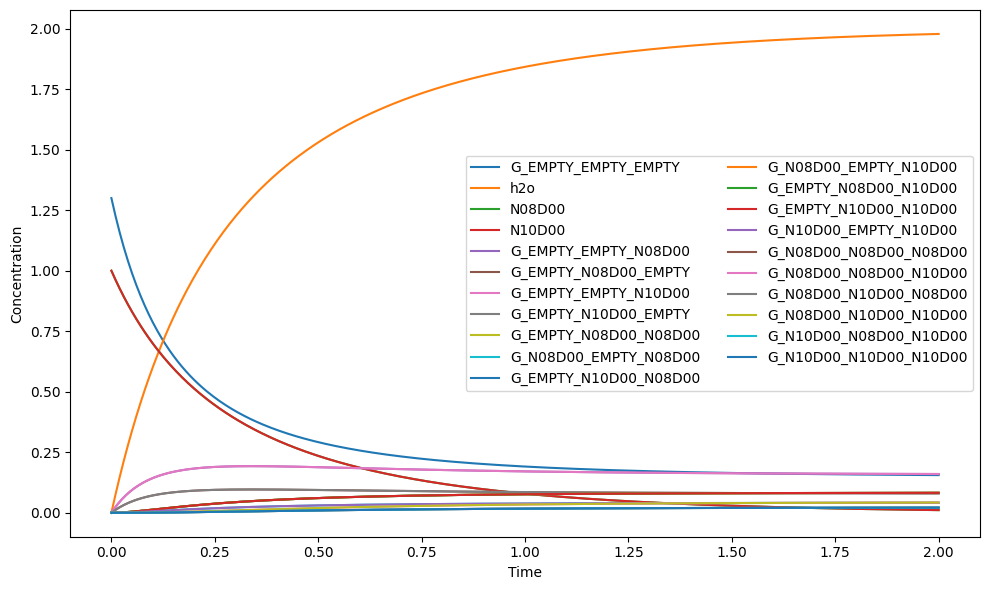

Species                   Inital Concentration    Final Concentration    Inital Mass    Final Mass
----------------------  ----------------------  ---------------------  -------------  ------------
G_EMPTY_EMPTY_EMPTY                        1.3              0.155612         119.722      14.3309
h2o                                        0                1.97795            0          35.6328
N08D00                                     1                0.011025         144.214       1.58997
N10D00                                     1                0.011025         172.268       1.89926
G_EMPTY_EMPTY_N08D00                       0                0.160138           0          34.957
G_EMPTY_N08D00_EMPTY                       0                0.080069           0          17.4785
G_EMPTY_EMPTY_N10D00                       0                0.160138           0          39.4495
G_EMPTY_N10D00_EMPTY                       0                0.080069           0          19.7248
G_EMPTY_N08D00_N0

In [35]:
from glyze import FattyAcid, Glyceride, ChemReactSim
from rdkit import Chem
from rdkit.Chem import AllChem
from tabulate import tabulate
import pandas as pd
import numpy as np

# data set
fa2 = FattyAcid(length=2)
fa3 = FattyAcid(length=3)
fa4 = FattyAcid(length=4)
fa5 = FattyAcid(length=5)
fa6 = FattyAcid(length=6)
fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fa13 = FattyAcid(length=13)
fa14 = FattyAcid(length=14)
fa15 = FattyAcid(length=15)
fa16 = FattyAcid(length=16)
fa17 = FattyAcid(length=17)
fa18 = FattyAcid(length=18)
fa19 = FattyAcid(length=19)
fa20 = FattyAcid(length=20)
fa21 = FattyAcid(length=21)
fa22 = FattyAcid(length=22)

# glycerol
Gly = Glyceride(sn=(None, None, None))
# print(Gly.name)
glym = Gly.molar_mass
print(glym)

# sanity check:
mct = Glyceride(sn=(fa8, fa8, fa10))
mctm = mct.molar_mass

# water
"""Calculate the molar mass of the water in g/mol"""
# Build RDkit molecule and sum atomic masses
# Initialize empty RWMol
rw = Chem.RWMol()
# oxygen
o = rw.AddAtom(Chem.Atom(8)) 

# Connect to water
mol = rw.GetMol()
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)

h2omass = 0
for atom in mol.GetAtoms():
    h2omass += atom.GetMass()

# testing for esterification
list_of_fa=[fa8, fa10]
sim = ChemReactSim.p_kinetic_esterification(list_of_fa, initial_conc = [1.3, 1, 1], chem_flag=True)
sim.overall_order = 2
sol1 = sim.solve(t_span=(0.0, 2))
sim.plot(sol=sol1)

# tabulated form
inital_conc = sol1.y[:, 0]
final_conc = sol1.y[:, -1]
sp_mass = sim.masses
inital_mass = inital_conc*sp_mass
final_mass = final_conc*sp_mass
total_initial_mass = sum(inital_mass)
total_final_mass = sum(final_mass)
table = [*zip(sim.species_names, inital_conc, final_conc, inital_mass, final_mass)]
print(tabulate(table, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table = [
    ["Total Initial Mass", total_initial_mass],
    ["Total Final Mass", total_final_mass]
]
print(tabulate(summary_table, headers=["", "Mass"], floatfmt=".6g"))

# obtatining species names for deoderization
speciesnaming = sim.species_names
list_of_mixture = [Glyceride.from_name(speciesnaming[0])]
# print(Glyceride.from_name(speciesnaming[0]))
# print(list_of_mixture)
lists_of_glys = [Glyceride.from_name(name) for name in speciesnaming[2+len(list_of_fa):]]
list_of_mixture.extend(list_of_fa)
list_of_mixture.extend(lists_of_glys)
# print(list_of_fa)
# print(len(list_of_mixture))
# print(list_of_mixture)
# print(list_of_mixture[0])

# dictionary of mixtures (for display and for extraction)
dict_of_mixture = {}
# dict_of_mixture[speciesnaming[0]] = list_of_mixture[0], final_conc[0]
# print(len(speciesnaming)-2)
for i in range(len(speciesnaming)-4):
    dict_of_mixture[speciesnaming[i+4]] = lists_of_glys[i], final_conc[i+4]

# dictionary of mixtures (for display and for extraction)
# dict_of_mixture = {}
# dict_of_mixture[speciesnaming[0]] = list_of_mixture[0], final_conc[0]
# print(len(speciesnaming)-2)
# for i in range(len(speciesnaming)-2):
#     dict_of_mixture[speciesnaming[i+2]] = list_of_mixture[i+1], final_conc[i+2]
# tabledict = tabulate(dict_of_mixture, headers = ["Species", "Gly name", "Final Concentration"], floatfmt=".6g")
# print(tabledict)

# Convert dictionary to DataFrame using 'from_dict'
# orient='index' tells pandas the keys are rows
df = pd.DataFrame.from_dict(dict_of_mixture, orient='index', columns=['Mixture List', 'Concentration'])

# Display the table
print(df) # or just type 'df' if using Jupyter

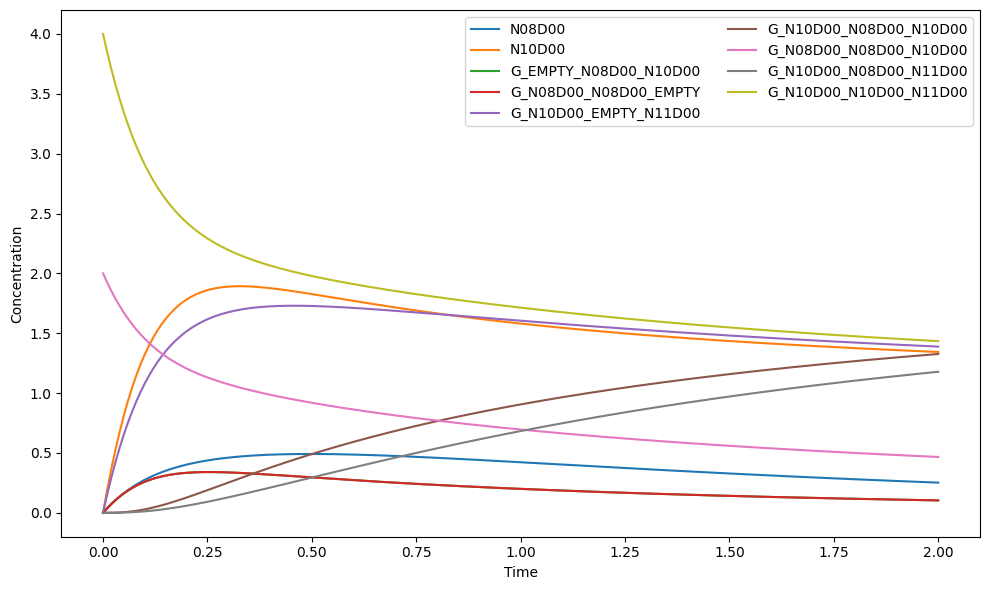

Species                   Inital Concentration    Final Concentration    Inital Mass    Final Mass
----------------------  ----------------------  ---------------------  -------------  ------------
N08D00                                       0               0.251957           0          31.7967
N10D00                                       0               1.34335            0         207.216
G_EMPTY_N08D00_N10D00                        0               0.103587           0          38.5909
G_N08D00_N08D00_EMPTY                        0               0.103587           0          35.6849
G_N10D00_EMPTY_N11D00                        0               1.38813            0         575.558
G_N10D00_N08D00_N10D00                       0               1.32645            0         698.773
G_N08D00_N08D00_N10D00                       2               0.466375         997.49      232.602
G_N10D00_N08D00_N11D00                       0               1.17808            0         637.137
G_N10D00_N10D00

ValueError: Invalid glyceride format: N08D00

In [ ]:
mct1 = Glyceride(sn=(fa8, fa8, fa10))
mct2 = Glyceride(sn=(fa10, fa10, fa11))
list_of_stuff=[mct1, mct2]
simu = ChemReactSim.p_kinetic_interesterification(list_of_stuff, initial_conc = [2,4], plucked = ["end", "mid"], arranged = ["mid", "end"], chem_flag=True)
simu.overall_order = 2.0
sol2 = simu.solve(t_span=(0.0, 2.0))
simu.plot(sol=sol2)

# tabulated form
inital_conc2 = sol2.y[:, 0]
final_conc2 = sol2.y[:, -1]
sp_mass = simu.masses
inital_mass2 = inital_conc2*sp_mass
final_mass2 = final_conc2*sp_mass
total_initial_mass2 = sum(inital_mass2)
total_final_mass2 = sum(final_mass2)
table2 = [*zip(simu.species_names, inital_conc2, final_conc2, inital_mass2, final_mass2)]
print(tabulate(table2, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table2 = [
    ["Total Initial Mass", total_initial_mass2],
    ["Total Final Mass", total_final_mass2]
]
print(tabulate(summary_table2, headers=["", "Mass"], floatfmt=".6g"))

# obtatining species names for deoderization
speciesnaming2 = simu.species_names
# list_of_mixture2 = [Glyceride.from_name(speciesnaming2[0])]
print(Glyceride.from_name(speciesnaming2[0]))
print(list_of_mixture2)
lists_of_glys2 = [Glyceride.from_name(name) for name in speciesnaming2[2+len(list_of_stuff):]]
list_of_mixture2.extend(list_of_stuff)
list_of_mixture2.extend(lists_of_glys2)
print(list_of_stuff)
print(len(list_of_mixture2))
print(list_of_mixture2)
print(list_of_mixture2[0])

#Deodorization
Now, we will take the output mixture and simulate a short-path distillation process.
We will assume the deodorization process removes all of the unbinded fatty acids, so we are only interested in how it changes the glyceride mixture.

The DeodorizaztionSim class will take in a list of glycerides - a list of glycerides, initial_mols - the list of the initial quantity of each glyceride species, temperature - the temperature of the reactor, pressure - the pressure of the reactor, and residence_time - the residence time in the reactor. dt and efficiency factor can be tweaked for accuracy.

In [36]:
class DeodorizationSim:
    def __init__(self, glycerides, initial_mols, temperature, pressure, residence_time, dt = 0.1, efficiency_factor = 0.5):
        self.glycerides = glycerides
        self.mols = initial_mols
        self.temperature = temperature
        self.pressure = pressure
        self.residence_time = residence_time
        self.dt = dt
        self.efficiency_factor = efficiency_factor
        
    def simulate(self):
        print("Starting deodorization simulation with {} mols, {} K, {} mTorr, {} s residence time".format(sum(self.mols), self.temperature, self.pressure, self.residence_time))
        for t in range(0, int(self.residence_time / self.dt)):
            for glyceride in self.glycerides:
                evaporation_rate = self.calculate_evaporation_rate(glyceride)
                self.mols[glyceride] -= evaporation_rate * self.dt * self.efficiency_factor
                # TODO: add surface area to get real evaporation rate
        return self.mols
    
    def mol_fraction(self, glyceride):
        total_mols = sum(self.mols)
        return self.mols[self.glycerides.index(glyceride)] / total_mols
    
    def vapor_pressure(self, glyceride):
        T_1mm = glyceride.T_1mTorr_vapor_pressure(glyceride.numCarbons)
        delta_H_vap = glyceride.enthalpy_of_vaporization(glyceride.numCarbons)
        R = 8.314e-3 #kJ/mol-K
        vapor_pressure = np.exp(-delta_H_vap/R * (1/self.temperature - 1/T_1mm) + np.log(T_1mm))
        return vapor_pressure

    def calculate_evaporation_rate(self, glyceride):
        R = 8.314 #J/mol-K
        x = self.mol_fraction(glyceride)
        Pvap = self.vapor_pressure(glyceride)
        molar_mass = glyceride.molar_mass
        evaporation_rate = x*Pvap/np.sqrt(2*np.pi*R*molar_mass*self.temperature) #mol/m2-s
        return evaporation_rate

Now, I will instantiate the class and run a simulation

In [37]:
glyceride_names = ['G_N02D00_N02D00_N02D00', 'G_N03D00_N03D00_N03D00', 'G_N04D00_N04D00_N04D00', 'G_N05D00_N05D00_N05D00', 'G_N06D00_N06D00_N06D00', 'G_N07D00_N07D00_N07D00', 'G_N08D00_N08D00_N08D00', 'G_N09D00_N09D00_N09D00', 'G_N10D00_N10D00_N10D00', 'G_N11D00_N11D00_N11D00', 'G_N12D00_N12D00_N12D00', 'G_N13D00_N13D00_N13D00', 'G_N14D00_N14D00_N14D00', 'G_N15D00_N15D00_N15D00', 'G_N16D00_N16D00_N16D00', 'G_N17D00_N17D00_N17D00', 'G_N18D00_N18D00_N18D00', 'G_N19D00_N19D00_N19D00', 'G_N20D00_N20D00_N20D00', 'G_N21D00_N21D00_N21D00', 'G_N22D00_N22D00_N22D00']
glycerides = [Glyceride.from_name(name) for name in glyceride_names]
initial_mols = [1.0 for glyceride in glycerides]
deodorizer = DeodorizationSim(glycerides, initial_mols, temperature = 773.15, pressure = 200, residence_time = 60*30)
final_mols = deodorizer.simulate()

Starting deodorization simulation with 21.0 mols, 773.15 K, 200 mTorr, 1800 s residence time


AttributeError: Module 'scipy' has no attribute 'log'